# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = pd.to_datetime(city_weather['dt'], unit='s')

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | natal
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | christchurch
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | timbiras
Processing Record 13 of Set 1 | palasa
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | weno
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 | wailua homesteads
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,natal,-5.7950,-35.2094,25.12,78,20,4.12,BR,2024-08-08 22:46:57
1,udachny,66.4167,112.4000,9.84,88,100,4.79,RU,2024-08-08 22:46:59
2,kodiak,57.7900,-152.4072,13.73,67,100,5.66,US,2024-08-08 22:47:00
3,blackmans bay,-43.0167,147.3167,11.40,73,72,0.89,AU,2024-08-08 22:47:01
4,iqaluit,63.7506,-68.5145,11.85,81,100,5.14,CA,2024-08-08 22:47:03


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,natal,-5.7950,-35.2094,25.12,78,20,4.12,BR,2024-08-08 22:46:57
1,udachny,66.4167,112.4000,9.84,88,100,4.79,RU,2024-08-08 22:46:59
2,kodiak,57.7900,-152.4072,13.73,67,100,5.66,US,2024-08-08 22:47:00
3,blackmans bay,-43.0167,147.3167,11.40,73,72,0.89,AU,2024-08-08 22:47:01
4,iqaluit,63.7506,-68.5145,11.85,81,100,5.14,CA,2024-08-08 22:47:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

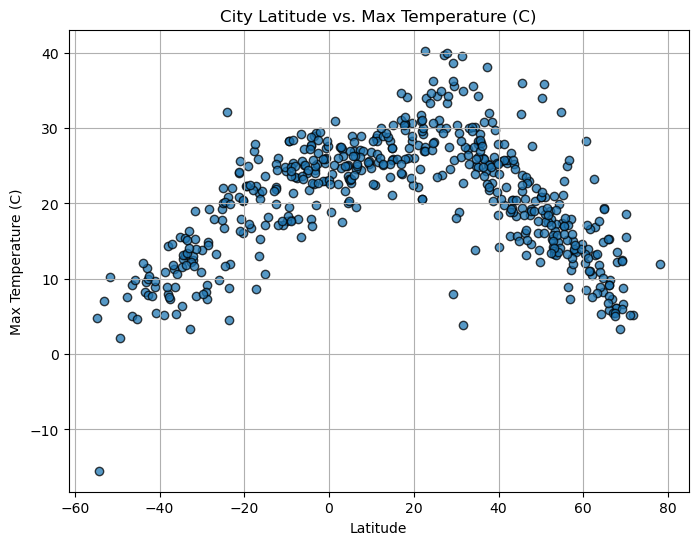

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (C)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
output_fig_path = "output_data/Fig1.png"
plt.savefig(output_fig_path)

# Show plot
plt.show()

#### Latitude Vs. Humidity

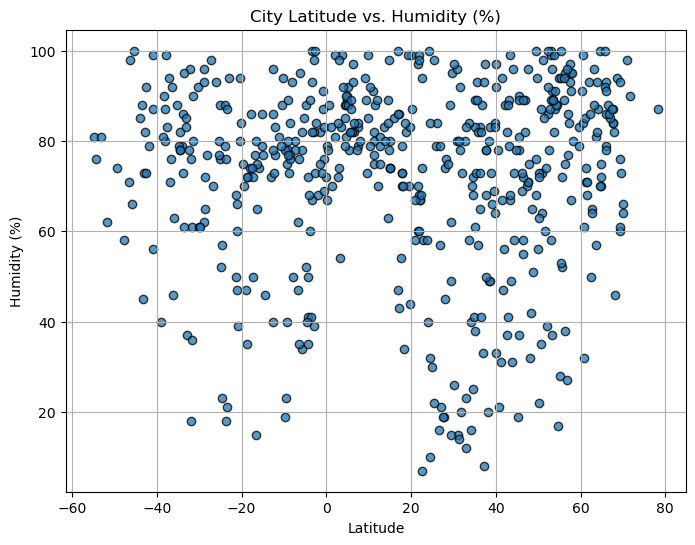

In [9]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
output_fig_path = "output_data/Fig2.png"
plt.savefig(output_fig_path)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

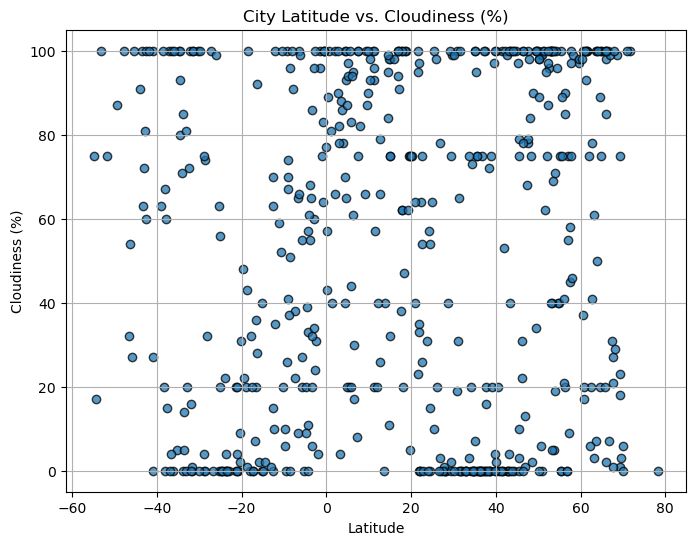

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
output_fig_path = "output_data/Fig3.png"
plt.savefig(output_fig_path)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

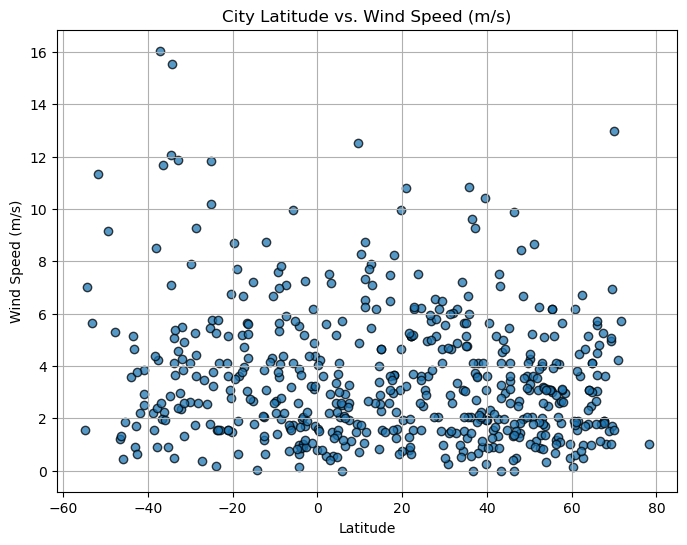

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
output_fig_path = "output_data/Fig4.png"
plt.savefig(output_fig_path)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label='X-axis', y_label='Y-axis', title='Linear Regression Plot'):
    """
    Creates a linear regression plot with scatter and regression line.
    
    Parameters:
    - x_values: Array-like, the x-values for the scatter plot.
    - y_values: Array-like, the y-values for the scatter plot.
    - x_label: String, label for the x-axis.
    - y_label: String, label for the y-axis.
    - title: String, title of the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Generate the regression line values
    regress_values = slope * x_values + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.75, label='Data Points')
    plt.plot(x_values, regress_values, color='red', label=line_eq)
    
    # Add titles and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    
    # Show plot
    plt.show()
    
    # Print the r^2-value
    print(f"The r^2-value is: {r_value**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,udachny,66.4167,112.4000,9.84,88,100,4.79,RU,2024-08-08 22:46:59
2,kodiak,57.7900,-152.4072,13.73,67,100,5.66,US,2024-08-08 22:47:00
4,iqaluit,63.7506,-68.5145,11.85,81,100,5.14,CA,2024-08-08 22:47:03
6,dudinka,69.4058,86.1778,6.70,76,1,6.95,RU,2024-08-08 22:43:09
7,stanley,54.8680,-1.6985,17.38,94,40,3.09,GB,2024-08-08 22:47:06


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,natal,-5.7950,-35.2094,25.12,78,20,4.12,BR,2024-08-08 22:46:57
3,blackmans bay,-43.0167,147.3167,11.40,73,72,0.89,AU,2024-08-08 22:47:01
5,christchurch,-43.5333,172.6333,8.28,88,100,5.14,NZ,2024-08-08 22:45:06
8,grytviken,-54.2811,-36.5092,-15.47,76,17,7.02,GS,2024-08-08 22:47:08
9,adamstown,-25.0660,-130.1015,22.03,76,56,10.18,PN,2024-08-08 22:47:09


###  Temperature vs. Latitude Linear Regression Plot

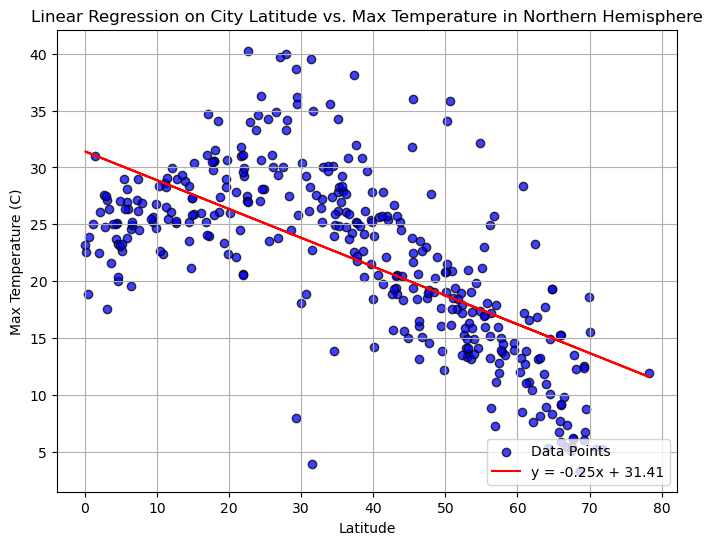

The r^2-value is: 0.43550634729143967


In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                   x_label='Latitude', y_label='Max Temperature (C)', 
                   title='Linear Regression on City Latitude vs. Max Temperature in Northern Hemisphere')

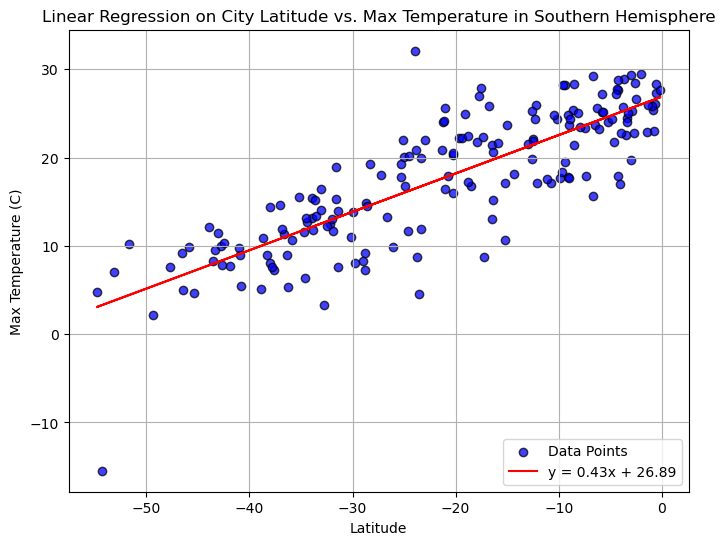

The r^2-value is: 0.6833303210851441


In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                   x_label='Latitude', y_label='Max Temperature (C)', 
                   title='Linear Regression on City Latitude vs. Max Temperature in Southern Hemisphere')

**Discussion about the linear relationship:** There is a strong indication for both hemispheres that the closer to the equator the higher the max temp.

### Humidity vs. Latitude Linear Regression Plot

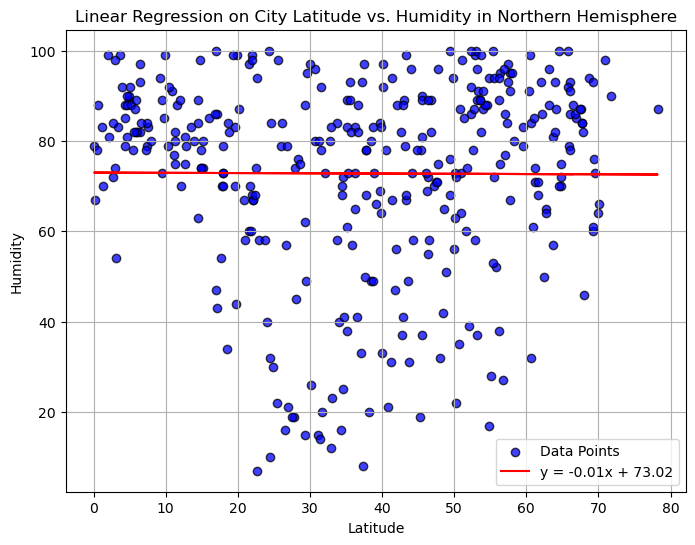

The r^2-value is: 2.4241564264428555e-05


In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                   x_label='Latitude', y_label='Humidity', 
                   title='Linear Regression on City Latitude vs. Humidity in Northern Hemisphere')

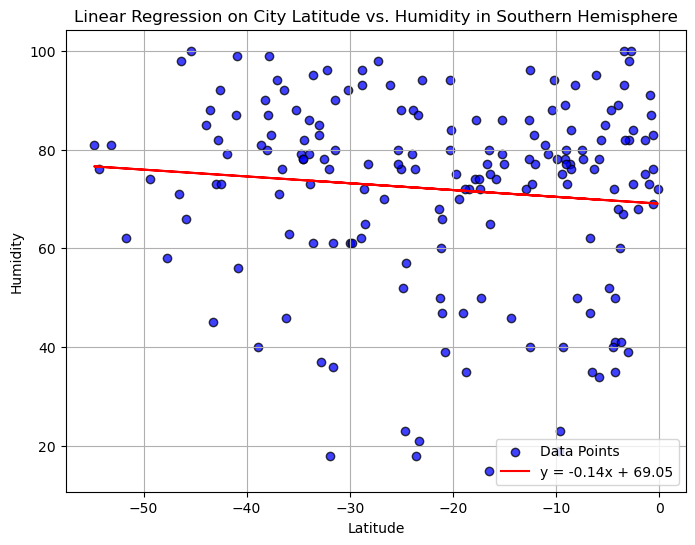

The r^2-value is: 0.010556492403067773


In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                   x_label='Latitude', y_label='Humidity', 
                   title='Linear Regression on City Latitude vs. Humidity in Southern Hemisphere')

**Discussion about the linear relationship:** Both lines don't really put a clear indication there is a correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

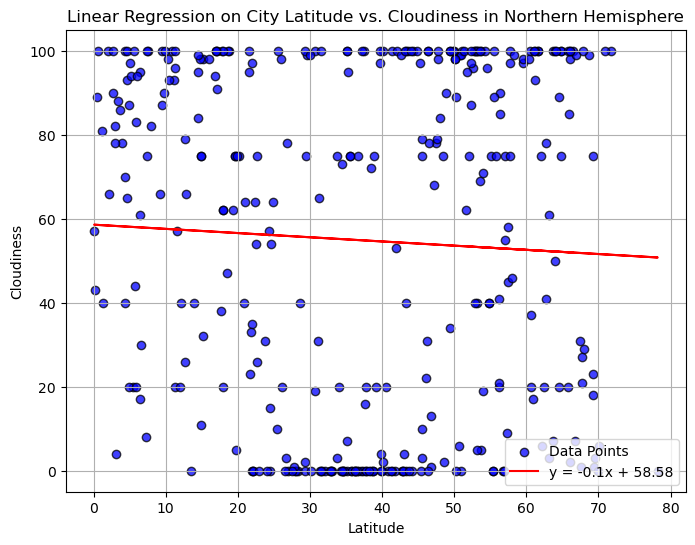

The r^2-value is: 0.0024159829502481047


In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                   x_label='Latitude', y_label='Cloudiness', 
                   title='Linear Regression on City Latitude vs. Cloudiness in Northern Hemisphere')

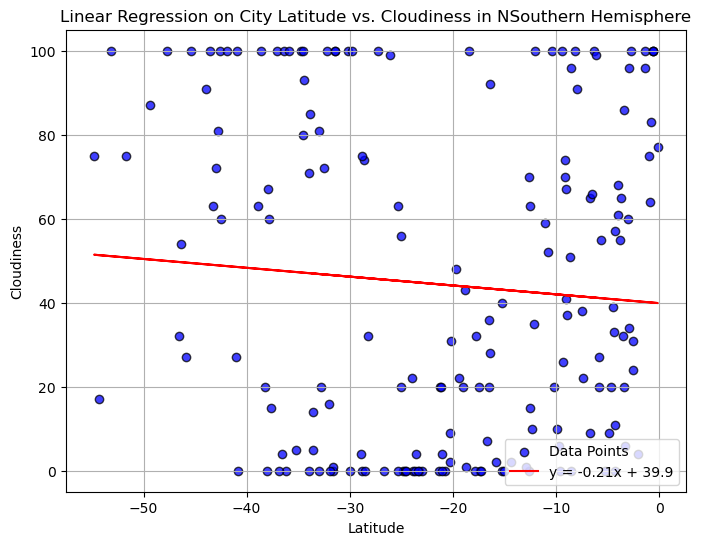

The r^2-value is: 0.006308613626597687


In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                   x_label='Latitude', y_label='Cloudiness', 
                   title='Linear Regression on City Latitude vs. Cloudiness in NSouthern Hemisphere')

**Discussion about the linear relationship:** Both lines don't really put a clear indication there is a correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

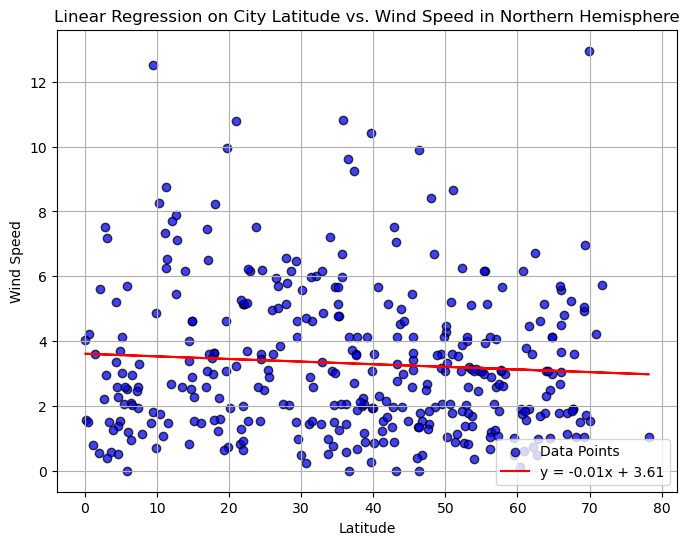

The r^2-value is: 0.005043015327181559


In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                   x_label='Latitude', y_label='Wind Speed', 
                   title='Linear Regression on City Latitude vs. Wind Speed in Northern Hemisphere')

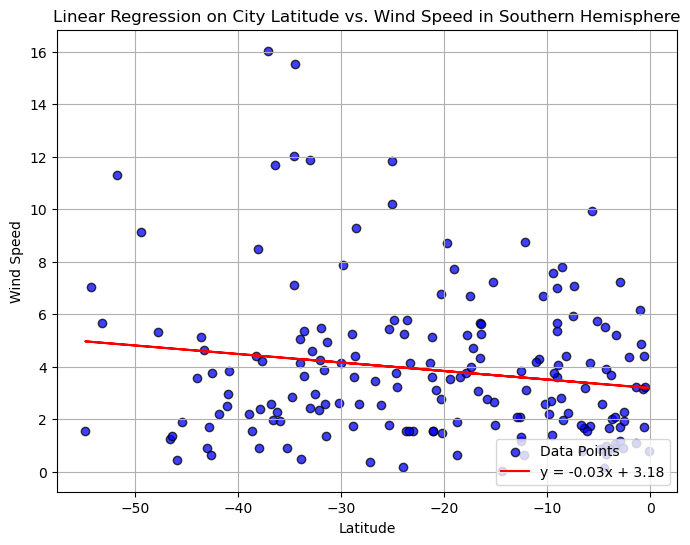

The r^2-value is: 0.026693829513133777


In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                   x_label='Latitude', y_label='Wind Speed', 
                   title='Linear Regression on City Latitude vs. Wind Speed in Southern Hemisphere')

**Discussion about the linear relationship:** Both lines don't really put a clear indication there is a correlation between latitude and wind speed.